In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)

seoul_area = gpd.GeoDataFrame.from_file('data/LARD_ADM_SECT_SGG_11.shp', encoding='cp949')

c:\Users\dlagh\anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
c:\Users\dlagh\anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out


In [2]:
seoul_area

ADM_SECT_C  SGG_NM  SGG_OID COL_ADM_SE  GID  \
0       11740     강동구      337      11740  127   
1       11710     송파구     1969      11710  128   
2       11680     강남구       33      11680  129   
3       11650     서초구       33      11650  130   
4       11620     관악구       33      11620  131   
5       11590     동작구      689      11590  132   
6       11560    영등포구      481      11560  133   
7       11545     금천구       33      11545  134   
8       11530     구로구       33      11530  135   
9       11500     강서구       65      11500  136   
10      11440     마포구      673      11440  138   
11      11410    서대문구     1025      11410  139   
12      11380     은평구       33      11380  140   
13      11350  서울시노원구       33      11350  141   
14      11320  서울시도봉구       33      11320  142   
15      11305     강북구       49      11305  143   
16      11290  서울시성북구      337      11290  144   
17      11260     중랑구       33      11260  145   
18      11230    동대문구       49      11230  146   
19      11215     광진구       33      11215  147   
20      11200     성동구       33      11200  148   
21      11170     용산구       33      11170  149   
22      11140      중구       33      11140  150   
23      11110     종로구      353      11110  151   
24      11470     양천구      337      11470  301   

                                             geometry  
0   POLYGON ((969713.132 1948846.288, 969692.451 1...  
1   POLYGON ((968640.372 1944982.492, 968640.957 1...  
2   POLYGON ((958696.114 1948605.678, 959195.920 1...  
3   POLYGON ((958117.753 1940073.855, 958118.398 1...  
4   POLYGON ((949321.250 1944035.054, 949323.256 1...  
5   POLYGON ((947237.833 1943029.684, 947245.149 1...  
6   POLYGON ((945060.841 1950575.575, 945060.701 1...  
7   POLYGON ((944458.844 1943077.341, 944482.865 1...  
8   POLYGON ((939273.809 1944348.583, 939285.784 1...  
9   MULTIPOLYGON (((935035.249 1950923.294, 935041...  
10  POLYGON ((942921.892 1952686.949, 942923.136 1...  
11  POLYGON ((947203.226 1953126.660, 947232.637 1...  
12  POLYGON ((952498.312 1959929.591, 952498.137 1...  
13  POLYGON ((959957.387 1959977.417, 959962.600 1...  
14  POLYGON ((960407.428 1962460.070, 960407.356 1...  
15  POLYGON ((956313.265 1965176.336, 956401.172 1...  
16  POLYGON ((956486.533 1958407.150, 956524.650 1...  
17  POLYGON ((963794.032 1957867.661, 963796.287 1...  
18  POLYGON ((957893.913 1953291.165, 957894.522 1...  
19  POLYGON ((962617.046 1947108.131, 962385.377 1...  
20  POLYGON ((960593.944 1951945.044, 960601.746 1...  
21  POLYGON ((950928.287 1948418.327, 950930.260 1...  
22  POLYGON ((954954.947 1952206.742, 954975.307 1...  
23  POLYGON ((953559.701 1959304.587, 953628.607 1...  
24  POLYGON ((940067.866 1949153.149, 940116.615 1...

In [32]:
geo_data = 'data/older_seoul.geojson'
geo_data
import geopandas as gpd

df = gpd.read_file(geo_data)
df.head()

시    구    동     행정동코드     인구    남자     여자  \
0  서울특별시  종로구  사직동  11110530   9700  4375   5325   
1  서울특별시  종로구  삼청동  11110540   3013  1443   1570   
2  서울특별시  종로구  부암동  11110550  10525  5002   5523   
3  서울특별시  종로구  평창동  11110560  18830  8817  10013   
4  서울특별시  종로구  무악동  11110570   8745  4078   4667   

                                            geometry  
0  MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...  
1  MULTIPOLYGON (((126.98269 37.59507, 126.98337 ...  
2  MULTIPOLYGON (((126.97585 37.59656, 126.97359 ...  
3  MULTIPOLYGON (((126.97507 37.63139, 126.97649 ...  
4  MULTIPOLYGON (((126.96067 37.58080, 126.96281 ...

In [33]:
gdf_exploded=df.explode()
gdf_exploded=gdf_exploded[gdf_exploded['구'].isin(['종로구','중구'])]
gdf_exploded = gdf_exploded.to_crs({'init':'epsg:5179'})

In [34]:
police=pd.read_csv("data/서울파출소_지구대_좌표.csv")
police=police[police['구명'].isin(['종로구','중구'])]
police['geometry'] = police.apply(lambda row : Point([row['lng'], row['lat']]), axis=1)
police = gpd.GeoDataFrame(police, geometry='geometry')
police.crs = {'init':'epsg:4326'}
police = police.to_crs({'init':'epsg:5179'})

c:\Users\dlagh\anaconda3\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
c:\Users\dlagh\anaconda3\lib\site-packages\geopandas\plotting.py:171: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]


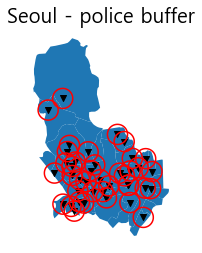

In [35]:
buf_poly = gpd.GeoDataFrame({'geometry': police.buffer(500)}) #1km
origin_ = gdf_exploded.groupby(['동']).apply(lambda x : x.area.sum())
ax = gdf_exploded['geometry'].plot()
police.plot(ax=ax, marker='v', color='black', label='police')
buf_poly.boundary.plot(ax=ax, color='red')
ax.set_title("Seoul - police buffer", fontsize=20)
ax.set_axis_off()
plt.show()
#print(origin_)

In [36]:
cctv=pd.read_csv('data/서울시CCTV좌표.csv')
cctv = cctv[['구명','법정동명','CCTV수량','lat','lng']]
cctv=cctv[cctv['구명'].isin(['종로구','중구'])]
cctv['geometry'] = cctv.apply(lambda row : Point([row['lng'], row['lat']]), axis=1)
cctv = gpd.GeoDataFrame(cctv, geometry='geometry')
cctv.crs = {'init':'epsg:4326'}
cctv = cctv.to_crs({'init':'epsg:5179'})

c:\Users\dlagh\anaconda3\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
c:\Users\dlagh\anaconda3\lib\site-packages\geopandas\plotting.py:171: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]


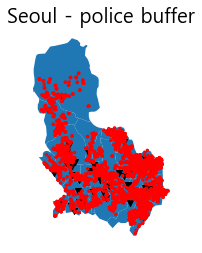

In [37]:
buf_poly2 = gpd.GeoDataFrame({'geometry': cctv.buffer(50)}) #1km
origin_ = gdf_exploded.groupby(['동']).apply(lambda x : x.area.sum())
ax = gdf_exploded['geometry'].plot()
police.plot(ax=ax, marker='v', color='black', label='police')
buf_poly2.boundary.plot(ax=ax, color='red')
ax.set_title("Seoul - police buffer", fontsize=20)
ax.set_axis_off()
plt.show()
#print(origin_)

In [38]:
buf_poly3=pd.concat([buf_poly,buf_poly2])

c:\Users\dlagh\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1589: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
c:\Users\dlagh\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1589: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  result[:] = values
c:\Users\dlagh\anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
c:\Users\dlagh\anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: Iterat

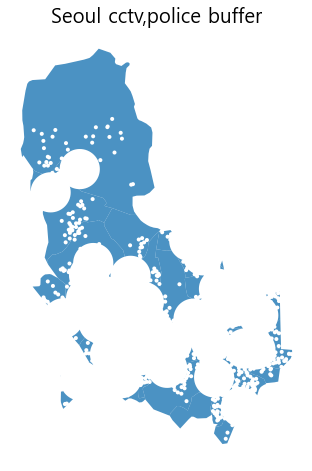

전체 대비 미커버지역 비율
동
평창동            90.0
무악동            69.0
삼청동            66.0
부암동            56.0
필동             51.0
장충동            48.0
동화동            46.0
가회동            44.0
청운효자동          39.0
종로1.2.3.4가동    34.0
약수동            31.0
청구동            29.0
신당5동           28.0
황학동            26.0
이화동            24.0
다산동            23.0
혜화동            15.0
교남동            14.0
숭인2동           13.0
중림동            12.0
dtype: float64


In [39]:
dif_area = gpd.overlay(gdf_exploded, buf_poly3, how='difference')
dif_area = dif_area.dissolve(by='동')
ax = dif_area.plot(figsize=(8,8), alpha=0.8)
ax.set_title("Seoul cctv,police buffer", fontsize=20)
ax.set_axis_off()
plt.show()
rate=round(dif_area.area / origin_ * 100)
rate=rate.sort_values(ascending=False)
print("전체 대비 미커버지역 비율")
print(rate.head(20))